# **Ex. 1 - First steps with scikit-learn**

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [90]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


**Felipe's notes:** above we took a look at the possible labels, as said in the text. The np.unique is a function which returns all the values without repeat them. If we want, we can print the sum of each outcome.

In [91]:
labels, counts = np.unique(y, return_counts=True)
for label in labels:
    print('Label:', label, 'Count:', counts[label])

Label: 0 Count: 50
Label: 1 Count: 50
Label: 2 Count: 50


**Felipe's notes:** we can see that we're not going to use all the features. We selected only the petal's features. It's simpler to visualize the results at plottings.

Splitting data into 70% training and 30% test data:

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [93]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**Felipe's notes:** it's important to normalize the data, because it will help to handle with outliers points. It will result in a vector with a mean near of zero and standard deviation of 1.

In [95]:
print(X_train_std)
print("-------------------------------------------------------------------")
print(">> Mean              :", X_train_std.mean(axis=0))
print(">> Standard Deviation:", X_train_std.std(axis=0))

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.0097479   1.57698181]
 [ 1.56747294  1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.12129291  0.5281578 ]
 [ 0.45202286  0.1348488 ]
 [-0.27301968 -0.2584602 ]
 [ 0.06161534  0.2659518 ]
 [-1.38846976 -1.30728421]
 [ 0.50779537  0.0037458 ]
 [ 0.11738784  0.1348488 ]
 [ 0.73088538  0.92146681]
 [-1.05383474 -1.30728421]
 [-0.16147468 -0.2584602 ]
 [ 0.06161534  0.0037458 ]
 [-1.22115225 -1.30728421]
 [ 0.56356787  0.79036381]
 [ 1.73479045  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.39625036  0.1348488 ]
 [ 0.00584283 -0.1273572 ]
 [ 1.0097479   1.57698181]
 [ 0.50779537  0.2659518 ]
 [ 1.0097479   0.2659518 ]
 [ 1.12129291  1.31477581]
 [ 0.73088538  1.57698181]
 [ 0.17316034  0.1348488 ]
 [-1.27692475 -1.04507821]
 [ 1.62324544  1.31477581]
 [ 0.67511288  0.92146681]
 [ 0.56356787  0.79036381]
 [ 1.0097479   1.18367281]
 [ 0.22893285  0.3970548 ]
 

In [96]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[colors[label] for label in y_test],
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **Ex. 2 - Modeling class probabilities via logistic regression**

### *Part 1 - Train a logistic regression model* (check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with scikit-learn: use C=100.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set.

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


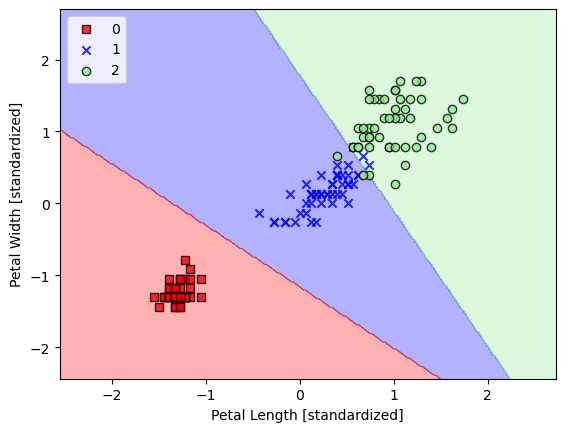

Test set accuracy: 0.98


In [97]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Criar e treinar o modelo de regressão logística
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# Plotar as regiões de decisão
plot_decision_regions(X_combined_std, y_combined, classifier=lr)

# Adicionar rótulos ao gráfico
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Avaliar o desempenho no conjunto de teste
accuracy = lr.score(X_test_std, y_test)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')


### *Part 2 - Tackling overfitting via regularization*: evaluate different values for C (up to 100) and observe the accuracy difference between training and test sets. Plot the results.

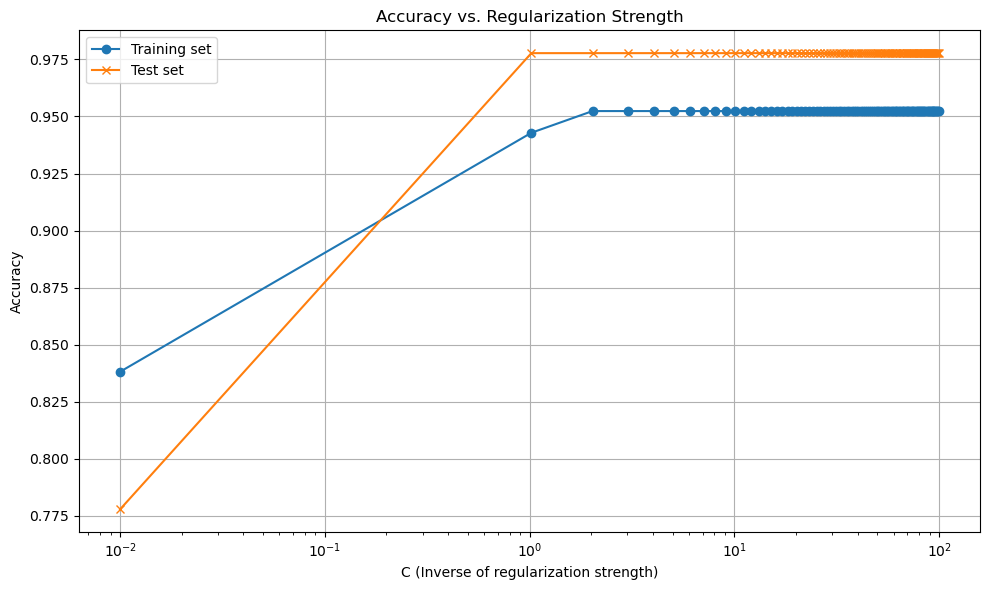

In [98]:
from sklearn.metrics import accuracy_score

# Set the values of C to test
C_values = np.linspace(0.01, 100, 100)
train_accuracies = []
test_accuracies = []

# Iterating over values of C
for C in C_values:
    # Training the Logistic Regression model
    lr = LogisticRegression(C=C, random_state=1)
    lr.fit(X_train_std, y_train)
    
    # Calculating the accuracy for the training and test sets
    train_accuracy = accuracy_score(y_train, lr.predict(X_train_std))
    test_accuracy  = accuracy_score(y_test, lr.predict(X_test_std))
    
    # Storing the accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training set', marker='o')
plt.plot(C_values, test_accuracies, label='Test set', marker='x')
plt.xscale('log')
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Regularization Strength')
plt.grid(True)
plt.tight_layout()
plt.show()


**Felipe's Note:** The best result seems to be 2, because it's the inflection point for training set.

Test set accuracy: 0.98


/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


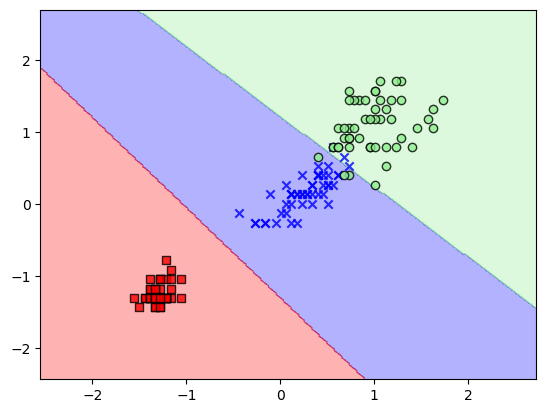

In [99]:
lr_C = LogisticRegression(C=2.0, random_state=1)
lr_C.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr_C)
accuracy = lr.score(X_test_std, y_test)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')


# **Ex. 3 - Maximum margin classification with support vector machines**

### *Part 1 - Dealing with the nonlinearly separable case using slack variables* (check linear kernel at https://scikit-learn.org/stable/modules/svm.html): use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set.

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


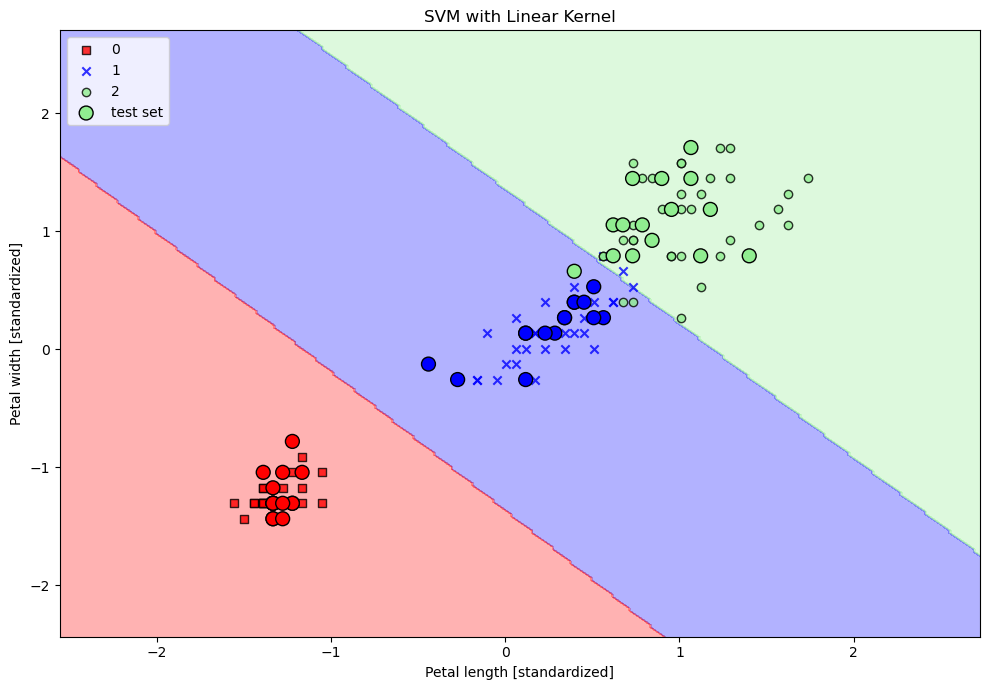

Test set accuracy: 0.98


In [100]:
from sklearn.svm import SVC

# Train a SVM with linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

# Plotting again
plt.figure(figsize=(10, 7))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('SVM with Linear Kernel')
plt.tight_layout()
plt.show()

accuracy = svm.score(X_test_std, y_test)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')

**Felipe's Notes:** The SVM was great to split the data points into three classes. The result, because linear, was two lines as hyperplane. 

### *Part 2 - Using the kernel trick to find separating hyperplanes in higher dimensional space*: use kernel='rbf', C=1.0, gamma=0.2, and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. Compare and discuss the results with the previous case. Try different values for the kernel parameter and evaluate the results.

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


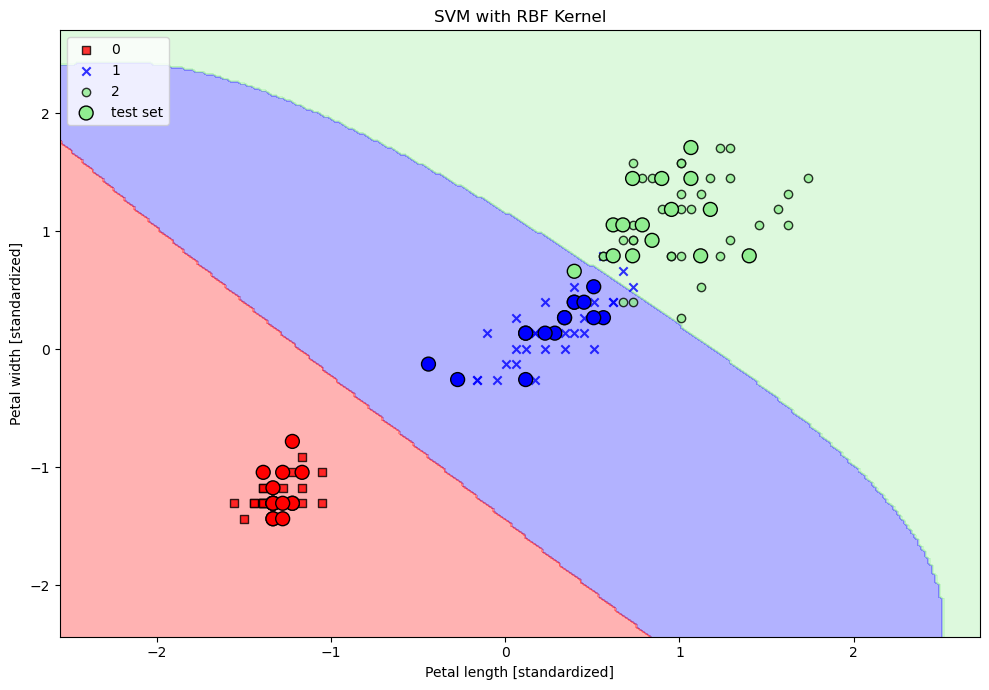

Test set accuracy: 0.98


In [101]:
# Train a SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm_rbf.fit(X_train_std, y_train)

# Plot the decision regions
plt.figure(figsize=(10, 7))
plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('SVM with RBF Kernel')
plt.tight_layout()
plt.show()

# Evaluate the model on test set
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')

**Felipe's Notes:** we can notice we don't have more two straigth lines after change the kernel hyperameter. Now we have two lines with curvature. This suavize the division between the classes. It seems to be betters.

# **Ex. 4 - Decision tree learning**

### *Part 1 - Building a decision tree* (check https://scikit-learn.org/stable/modules/tree.html): use criterion='entropy', max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Try different values for the max_depth and check the result.

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


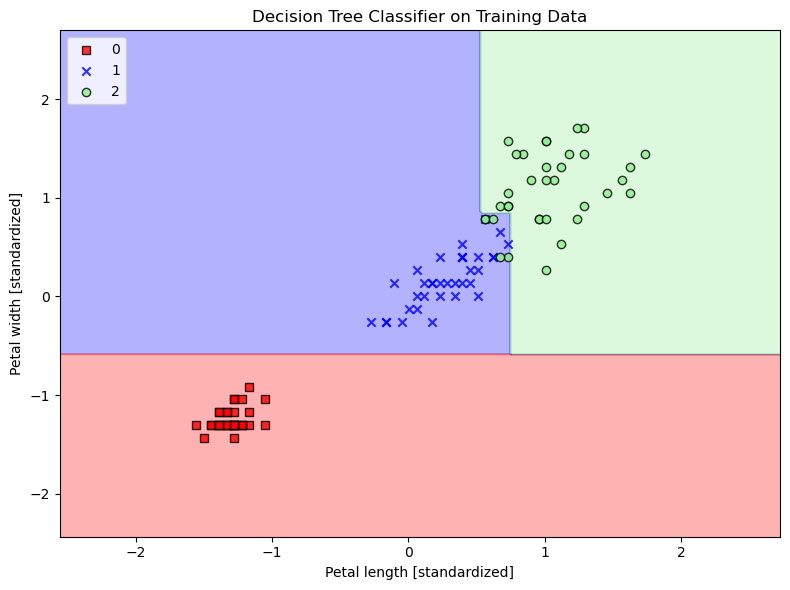

Test set accuracy: 0.98


In [102]:
from sklearn.tree import DecisionTreeClassifier

# Build the decision tree
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree_model.fit(X_train_std, y_train)

# Plot the decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_std, y_train, classifier=tree_model)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Decision Tree Classifier on Training Data')
plt.tight_layout()
plt.show()

# Evaluating the model on test set
y_pred = tree_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')

**Felipe's Note:** we had four green balls wrongly classified.

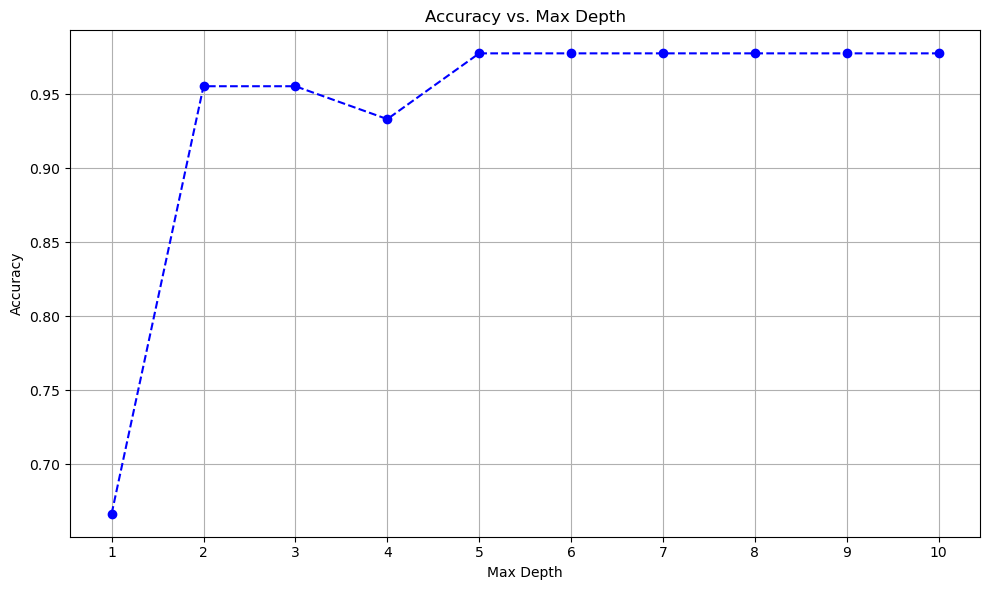

In [103]:
# List to store accuracies for different values of max_depth
accuracies = []

# Range of max_depth values
depth_range = range(1, 11)

# Train the model for each max_depth and evaluate on test set
for depth in depth_range:
    # Build and train the decision tree
    tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)
    tree_model.fit(X_train_std, y_train)
    
    # Evaluate the model on test set
    y_pred = tree_model.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracies for different values of max_depth
plt.figure(figsize=(10, 6))
plt.plot(depth_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.grid(True)
plt.tight_layout()
plt.show()


**Felipe's Note:** we can see the best max_depth is 5. Let's try it!

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


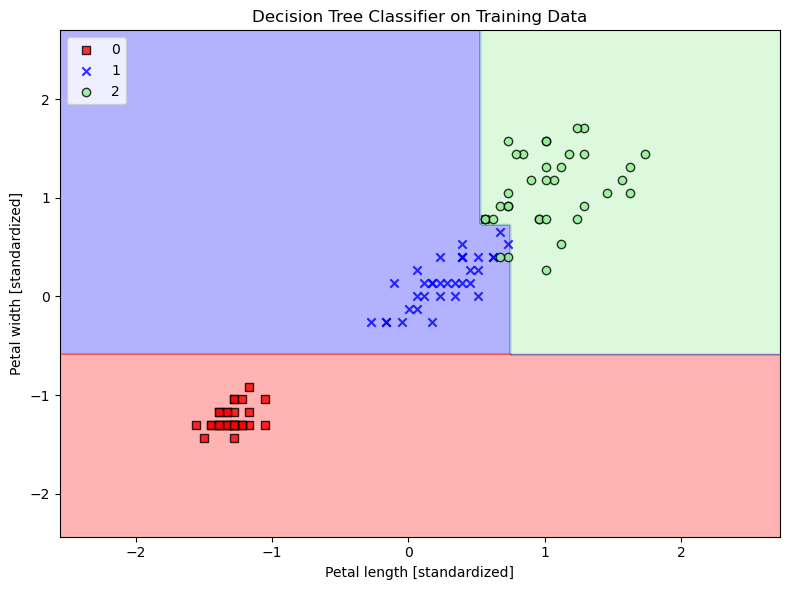

Test set accuracy: 0.98


In [104]:
# Build the decision tree
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
tree_model.fit(X_train_std, y_train)

# Plot the decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_std, y_train, classifier=tree_model)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Decision Tree Classifier on Training Data')
plt.tight_layout()
plt.show()

# Evaluating the model on test set
y_pred = tree_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')

**Felipe's Note:** now we have only two wrongly classifications.

### *Part 2 - Combining weak to strong learners via random forests* (check https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): use criterion='entropy', n_estimators=25, max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Compare with the single tree case. Try different values for the number of trees and check the result.

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


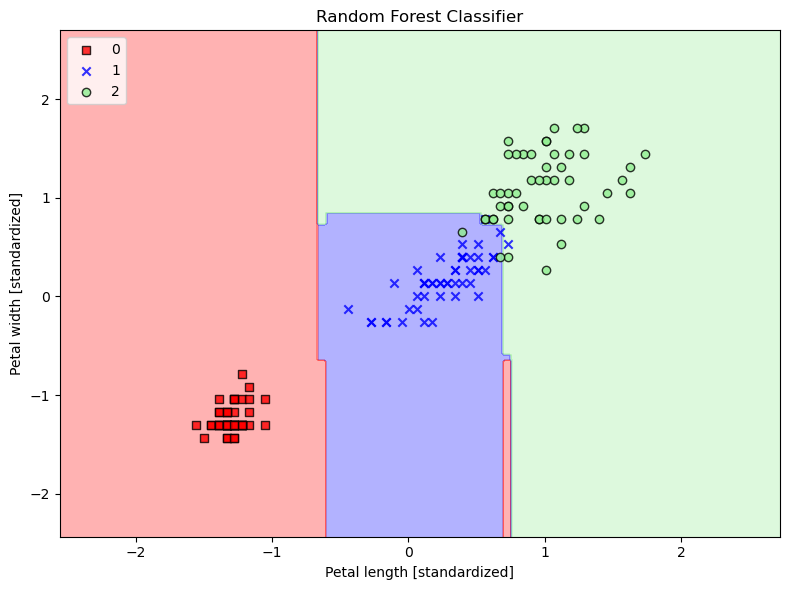

Test set accuracy: 0.98


In [105]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion    = 'entropy',
                                n_estimators = 25, 
                                max_depth    = 4,
                                random_state = 1,
                                n_jobs       = 1)
forest.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined_std, y_combined, classifier=forest)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Random Forest Classifier')
plt.tight_layout()
plt.show()

y_pred_forest = forest.predict(X_test_std)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')

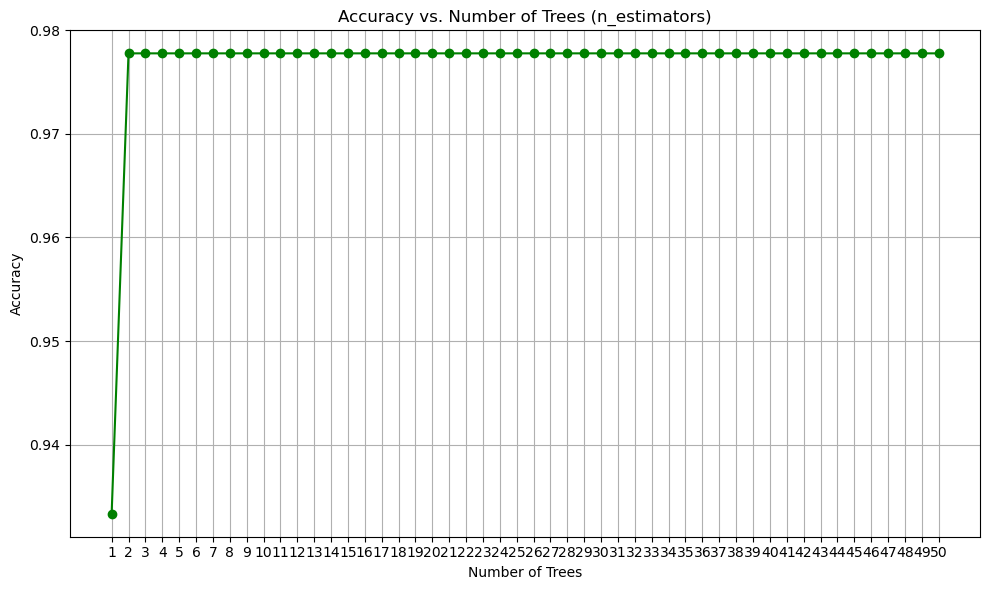

In [106]:
# List to store accuracies for different values of n_estimators
forest_accuracies = []

# Range of n_estimators values
estimators_range = range(1, 51)  # Considering from 1 to 50 trees for demonstration

# Train the model for each n_estimators and evaluate on test set
for n in estimators_range:
    # Build and train the random forest
    forest_model = RandomForestClassifier(criterion='entropy', n_estimators=n, max_depth=4, random_state=1)
    forest_model.fit(X_train_std, y_train)
    
    # Evaluate the model on test set
    y_pred_forest = forest_model.predict(X_test_std)
    accuracy_forest = accuracy_score(y_test, y_pred_forest)
    
    # Append the accuracy to the list
    forest_accuracies.append(accuracy_forest)

# Plot the accuracies for different values of n_estimators
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, forest_accuracies, marker='o', linestyle='-', color='g')
plt.title('Accuracy vs. Number of Trees (n_estimators)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(estimators_range)
plt.grid(True)
plt.tight_layout()
plt.show()


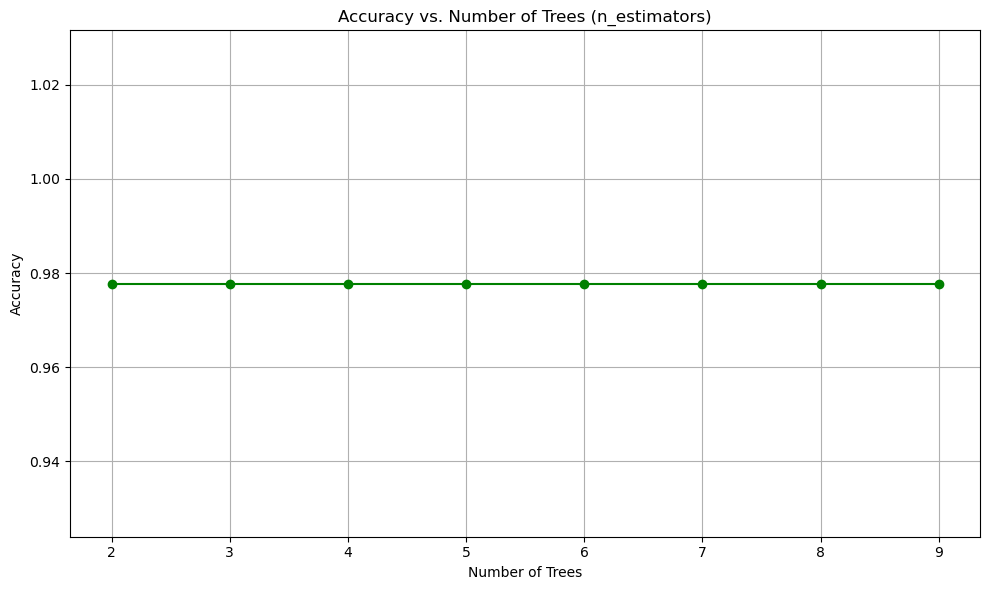

In [107]:
# List to store accuracies for different values of n_estimators
forest_accuracies = []

# Range of n_estimators values
estimators_range = range(2, 10)  # Considering from 1 to 50 trees for demonstration

# Train the model for each n_estimators and evaluate on test set
for n in estimators_range:
    # Build and train the random forest
    forest_model = RandomForestClassifier(criterion='entropy', n_estimators=n, max_depth=4, random_state=1)
    forest_model.fit(X_train_std, y_train)
    
    # Evaluate the model on test set
    y_pred_forest = forest_model.predict(X_test_std)
    accuracy_forest = accuracy_score(y_test, y_pred_forest)
    
    # Append the accuracy to the list
    forest_accuracies.append(accuracy_forest)

# Plot the accuracies for different values of n_estimators
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, forest_accuracies, marker='o', linestyle='-', color='g')
plt.title('Accuracy vs. Number of Trees (n_estimators)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(estimators_range)
plt.grid(True)
plt.tight_layout()
plt.show()


**Felipe's Note:** it seems only 2 trees are enough.

/tmp/ipykernel_500395/4096730260.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


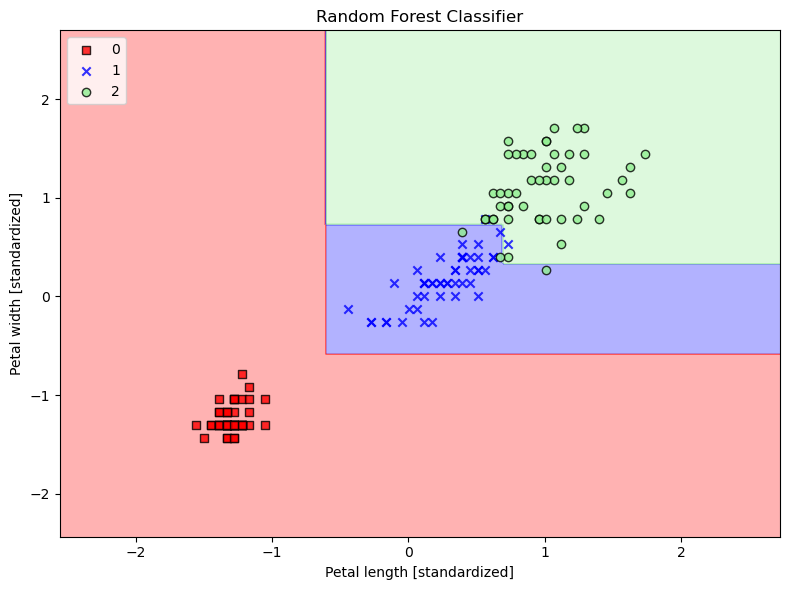

Test set accuracy: 0.98


In [108]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion    = 'entropy',
                                n_estimators = 2, 
                                max_depth    = 4,
                                random_state = 1,
                                n_jobs       = 1)
forest.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined_std, y_combined, classifier=forest)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Random Forest Classifier')
plt.tight_layout()
plt.show()

y_pred_forest = forest.predict(X_test_std)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Test set accuracy: {lr_C.score(X_test_std, y_test):.2f}')